# Simple model to predict tumor size under Cheomeoterapy

I was diagnose with a 12cm Ewing's Arcoma on May/18. Since there, I'v been under cheomeoterapby (VDC+IE every 14days) and I got two new MRIs that showed significand and non-linear reduction in my tumor size. 

Between a discussion on how many chemeos cycles I should go by before starting the Radioterapy, I'm got curious in the probable size of my tumor during the next cycles.

This simple model tries to predic the size of my tumor after the end of each chemoeteraphy cycle. Once cyle last for 4weeks, I'm assuming it to be one month. The only assumption I made is that the tumor reduction will follow a sigmoid curve, saturating around a tumor of size 0 (100% of reduction). 

### import libraries and define functions

In [307]:
import numpy as np
import pylab
from scipy.optimize import curve_fit
%matplotlib inline


In [281]:
def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

def takeClosest(myList, myNumber):
    closest = myList[0]
    for i in range(1, len(myList)):
        if abs(myList[i] - myNumber) < abs(closest - myNumber):
            closest = myList[i]
            index = i
    return index, closest

### input empirical data

In [207]:
timedata = np.array([0,   2,  3]) #month in which I got MRI control
sizedata = np.array([12,  9,  6.5]) #tumor size observed during the MRIs
reductiondata = [(sizedata[0] - x) / sizedata[0] for x in sizedata]#accumulated reduction tax from the original size 
#reductiondata = np.array([0.0,  0.3,  0.45]) 

### fit a logistic curve to the data

In [208]:
popt, pcov = curve_fit(sigmoid, timedata, reductiondata)
print(popt)

[ 3.12212319  1.07138217]


In [209]:
time = np.linspace(-1, 15, 1000)
reduction = sigmoid(time, *popt)
size_proportion = [1 - i for i in reduction]
size = [12 * i for i in size_proportion]

### PLOTS

#### Tumor Reduction

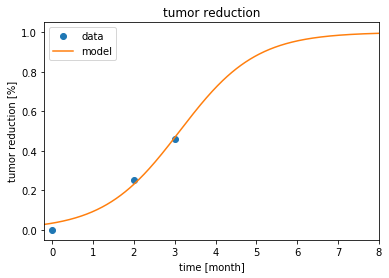

In [306]:
pylab.plot(timedata, reductiondata, 'o', label='data')
pylab.plot(time,reduction, label='model')
pylab.xlim(-.2, 8)
pylab.ylabel('tumor reduction [%]')
pylab.xlabel('time [month]')
pylab.title('tumor reduction')
pylab.legend(loc='best')
pylab.show()

#### Tumor Size

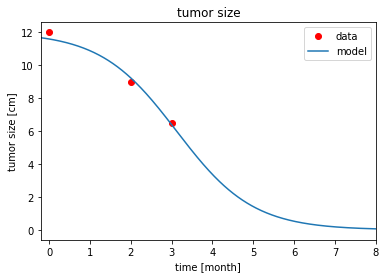

In [216]:
pylab.plot(timedata, sizedata, 'ro', label='data')
pylab.plot(time,size, label='model')
pylab.xlim(-.2, 8)
pylab.ylabel('tumor size [cm]')
pylab.xlabel('time [month]')
pylab.title('tumor size')
pylab.legend(loc='best')
pylab.show()

In [288]:
for month in [0,1,2,3,4,5,6,7,8,9,10]:
    print("tumor size in cm after", round(takeClosest(time, month)[1]) ,"month:",round(size[takeClosest(time, month)[0]],2),)

tumor size in cm after -0.0 month: 11.59
tumor size in cm after 1.0 month: 10.88
tumor size in cm after 2.0 month: 9.24
tumor size in cm after 3.0 month: 6.38
tumor size in cm after 4.0 month: 3.38
tumor size in cm after 5.0 month: 1.41
tumor size in cm after 6.0 month: 0.53
tumor size in cm after 7.0 month: 0.19
tumor size in cm after 8.0 month: 0.06
tumor size in cm after 9.0 month: 0.02
tumor size in cm after 10.0 month: 0.01


#### The model predics: 

1.4cm tumor at the end of 5th cycle of chemo

0.5cm tumor at the end of 6th cycle of chemo


# sandbox

## model 2

/home/jm/anaconda3/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


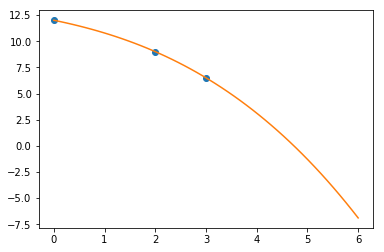

In [53]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([(0, 12), (2, 9), (3, 6.5)])
# get x and y vectors
x = points[:,0]
y = points[:,1]

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], 6.0, 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new)
#plt.xlim([x[0]-1, x[-1] + 1 ])
#plot.ylim(-1, 6)
plt.show()